In [1]:
from tensorflow.keras.layers import Conv2D,Flatten,Dense,MaxPool2D,BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
import numpy as np

In [2]:
img_height, img_width = (224,224)
batch_size = 32

train_data_dir = r"Flowers_dataset\processed_data\train"
valid_data_dir = r"Flowers_dataset\processed_data\val"
test_data_dir  = r"Flowers_dataset\processed_data\test"

In [3]:
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.4)


train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training') # set as training data


valid_generator = train_datagen.flow_from_directory(
    valid_data_dir, # same directory as training data
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation') # set as validation data

Found 1557 images belonging to 5 classes.
Found 342 images belonging to 5 classes.


In [4]:
test_generator = train_datagen.flow_from_directory(
    test_data_dir, # same directory as training data
    target_size=(img_height, img_width),
    batch_size=1,
    class_mode='categorical',
    subset='validation') # set as validation data

Found 347 images belonging to 5 classes.


In [6]:
x,y = test_generator.next()
x.shape

(1, 224, 224, 3)

In [5]:
train_generator.num_classes

5

In [11]:
base_model = ResNet50(include_top=False, weights='imagenet')
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(train_generator.num_classes, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False
    
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics = ['accuracy'])

model.fit(train_generator,
                         epochs = 10)

Epoch 1/10
49/49 [==============================] - 404s 8s/step - loss: 0.8449 - accuracy: 0.7373
Epoch 2/10
49/49 [==============================] - 409s 8s/step - loss: 0.3463 - accuracy: 0.8696
Epoch 3/10
49/49 [==============================] - 408s 8s/step - loss: 0.2248 - accuracy: 0.9223
Epoch 4/10
49/49 [==============================] - 406s 8s/step - loss: 0.1484 - accuracy: 0.9454
Epoch 5/10
49/49 [==============================] - 401s 8s/step - loss: 0.1755 - accuracy: 0.9306
Epoch 6/10
49/49 [==============================] - 405s 8s/step - loss: 0.1404 - accuracy: 0.9512
Epoch 7/10
49/49 [==============================] - 401s 8s/step - loss: 0.1057 - accuracy: 0.9660
Epoch 8/10
49/49 [==============================] - 402s 8s/step - loss: 0.0985 - accuracy: 0.9717
Epoch 9/10
49/49 [==============================] - 405s 8s/step - loss: 0.0831 - accuracy: 0.9724
Epoch 10/10
49/49 [==============================] - 403s 8s/step - loss: 0.0788 - accuracy: 0.9762


In [12]:
model.save('Flowers_dataset\Saved_Model\ResNet50_Flowers.h5' )

In [13]:
test_loss, test_acc = model.evaluate(test_generator, verbose=2)
print('\nTest accuracy:', test_acc)

11/11 - 19s - loss: 0.6953 - accuracy: 0.8213

Test accuracy: 0.82132566


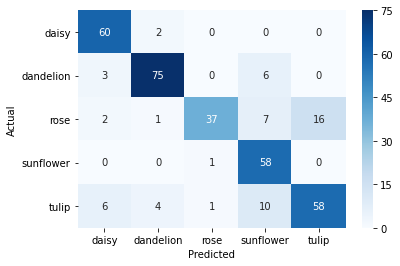

test accuracy : 82.9971181556196


In [28]:
import pandas as pd
import seaborn as sn
import tensorflow as tf

model = tf.keras.models.load_model("Flowers_dataset\Saved_Model\ResNet50_Flowers.h5")
filenames = test_generator.filenames
nb_samples = len(test_generator)
y_prob=[]
y_act=[]
test_generator.reset()
for _ in range(nb_samples):
  X_test,Y_test = test_generator.next()
  y_prob.append(model.predict(X_test))
  y_act.append(Y_test)

predicted_class = [list(train_generator.class_indices.keys())[i.argmax()] for i in y_prob]
actual_class = [list(train_generator.class_indices.keys())[i.argmax()] for i in y_act]


out_df = pd.DataFrame(np.vstack([predicted_class,actual_class]).T,columns=['predicted_class','actual_class'])
confusion_matrix = pd.crosstab(out_df['actual_class'],out_df['predicted_class'], rownames=['Actual'], colnames=['Predicted'])

sn.heatmap(confusion_matrix,cmap='Blues', annot=True,fmt='d')
plt.show()
print('test accuracy : {}'.format((np.diagonal(confusion_matrix).sum()/confusion_matrix.sum().sum()*100)))

In [7]:
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=1,
    class_mode='categorical',
    subset='training') # set as training data

Found 1557 images belonging to 5 classes.


In [8]:
test_generator = train_generator

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


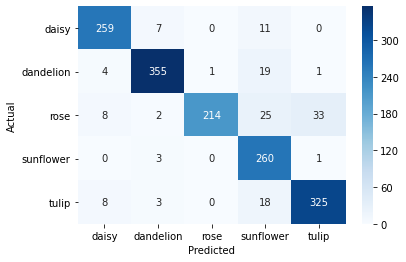

test accuracy : 90.7514450867052


In [9]:
import pandas as pd
import seaborn as sn
import tensorflow as tf

model = tf.keras.models.load_model("Flowers_dataset\Saved_Model\ResNet50_Flowers.h5")
filenames = test_generator.filenames
nb_samples = len(test_generator)
y_prob=[]
y_act=[]
test_generator.reset()
for _ in range(nb_samples):
  X_test,Y_test = test_generator.next()
  y_prob.append(model.predict(X_test))
  y_act.append(Y_test)

predicted_class = [list(train_generator.class_indices.keys())[i.argmax()] for i in y_prob]
actual_class = [list(train_generator.class_indices.keys())[i.argmax()] for i in y_act]


out_df = pd.DataFrame(np.vstack([predicted_class,actual_class]).T,columns=['predicted_class','actual_class'])
confusion_matrix = pd.crosstab(out_df['actual_class'],out_df['predicted_class'], rownames=['Actual'], colnames=['Predicted'])

sn.heatmap(confusion_matrix,cmap='Blues', annot=True,fmt='d')
plt.show()
print('test accuracy : {}'.format((np.diagonal(confusion_matrix).sum()/confusion_matrix.sum().sum()*100)))